In [224]:
#Import the required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [225]:
#load the train the test dataset in pandas DataFrame
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [226]:
#Check numbers of rows and columns in rain dataset
train.shape

(8523, 12)

In [227]:
#Print the number of columns in train dataset
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [228]:
#Check the number of rows and columns in test dataset
test.shape

(5681, 11)

In [229]:
#Print the name of the columns in test dataset
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [230]:
#Combine test and train into one file to perform EDA
train["source"] = "train"
test["source"] = "test"
data = pd.concat([train, test], ignore_index = True)
print(data.shape)

(14204, 13)


In [231]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [232]:
#Describe function for numerical data summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [233]:
#check for missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [234]:
#The column Item_weight has two thousand four hundred thirty nine (2439) missing values and outlet_size has around four thousand and sixteen (4016).
#item outlet_sales has five thousand sixx hundred eighty one (5681) missing values, which we will predict using the model.


In [235]:
#Print the uniqu e values in th eitem_Fat_Content column, where there are only two unique types of fata content in items: low and regulator
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [236]:
#Print the unique values in the Outlet_Establishment_Year column, where the date ranges from 1985 to 2009
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [237]:
#Calculate the Outlet_Age
data["Outloet_Age"] = 2018 - data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outloet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [238]:
#Unique Values in Outlet_Size
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [239]:
#Printing the count value of Item_Fat_Content 
data["Item_Fat_Content"].value_counts()
#We can see that low fat products are the most abundant

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [240]:
#print the count value of Outlet_Size
data["Outlet_Size"].value_counts()
#We can see that majority outlets are medium  and small-scale outlets

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [241]:
#Use the mode function to find out the most common value in Outlet_Size
data["Outlet_Size"].mode()[0]
#The output shoss that medium is the most commonly occurring value

'Medium'

In [242]:
#Two variable with missing values - Item_Weight and Outlet_Size
#Replacing missing values in OUtlet_Size with the value "meedium"
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [243]:
#Replacing missing values in Item_Weight with the mean "medium"
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mode())

<AxesSubplot: >

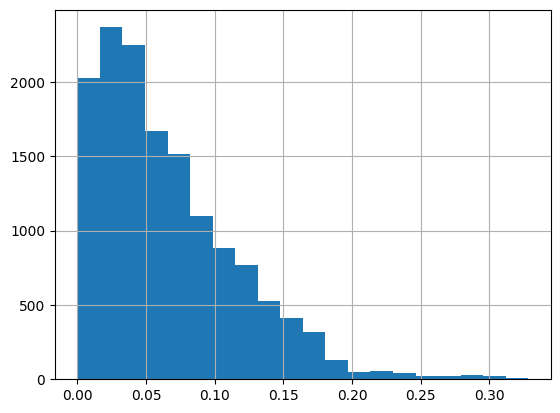

In [244]:
#plot a histogram to reveal the distribution of Item_Visibility column
data["Item_Visibility"].hist(bins=20)

In [245]:
#Detecting Outliers:
#An outlier is a data point that lies outside the overalll pattern in a distribution.
#A commonly used rule states that a data point is an outlier if it is more than 1.5*IQR above the third quantile or below the ofrst quartile.
#using this, one can remove the outloers and output the resulting data in fill_data variable.
#calculate the first quantile for Item_visibility
Q1 = data ["Item_Visibility"].quantile(0.25)

In [246]:
#Calculate the second quantile
Q3 = data["Item_Visibility"].quantile(0.75)

In [247]:
#Calculate the interquantile rang (IQR)
IQR = Q3 - Q1

In [248]:
#Now that the IQR range is kneon, remove outliers from the data
#The resulting data is stored in fill_data variable
fill_data = data.query('(@Q1 - 1.5 * @IQR) <= Item_Visibility <= (@Q3 + 1.5 * @IQR)')

In [249]:
#Display the data
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outloet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,19
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,9


In [250]:
#check the shape of the resulting dataset without the outliers
fill_data.shape

(13943, 14)

In [251]:
#shape the original dataset is fourteen thousand two hundred and four (14204) rows and fourteen column with outliers
data.shape

(14204, 14)

In [252]:
#Assign fill_data dataset to data DataFrame
data = fill_data

In [253]:
data.shape

(13943, 14)

In [254]:
#Modify Item_Visibility by converting the numerical values into the categories low Visibility, Visibility, and High Visibility
data["Item_Visibility_bins"] = pd.cut(data["Item_Visibility"], [0.000, 0.065, 0.13, 0.2], labels = ['Low Viz', 'Viz', 'High Viz'])

In [255]:
#Print the count of Item_Visibility_bins
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [256]:
#Replace null values with low Visibility
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan, "Low Viz", regex=True)

In [257]:
#We found typos and differences in representation in categories of Item_Fat_Content variable.
#This can be corrected using the code on screen.

#Replace all other represeanttions of low fat with low Fat
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["low fat", "LF"], "Low Fat")

In [258]:
#Replace all representations of reg with Regular
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace(["reg", "Regular"])

In [259]:
#Print unique fat count values
data["Item_Fat_Content"].unique()

array(['Low Fat'], dtype=object)

In [260]:
#Code all categories variables as numeric using 'LabekEncoder' from sklearn's preparations module
#initiate the label encoder
le = LabelEncoder()

In [261]:
#Transform Item_Fat_Content
data["Item_Fat_Content"]=le.fit_transform(data["Item_Fat_Content"])

In [262]:
#Transform Item_Visibility_bins
data["Item_Visibility_bins"]=le.fit_transform(data["Item_Visibility_bins"])

In [263]:
#Transform Outlet_Size
data["Outlet_Size"]=le.fit_transform(data["Outlet_Size"])

In [264]:
#Transform Outlet_Location_Type
data["Outlet_Size"]= le.fit_transform(data["Outlet_Size"])

In [265]:
#Print the unique values of Outlet_Type
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [266]:
dummy = pd.get_dummies(data["Outlet_Type"])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [267]:
#Explore the column Item_Identifier
data["Item_Identifier"]

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [268]:
#As there are multiple values of food, nonconsumable items, and drinks with different numbers, combine the item type
data["Item_Identifier"].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [269]:
#As multiple categories are present in Item_Identifier, reduce this by mapping 
data["Item_Type_Combined"] = data["Item_Identifier"].apply(lambda x: x[0:2])
data["Item_Type_Combined"] = data["Item_Type_Combined"].map({'FD': 'Food', 
                                                             'NC': 'Non-Comsumable',
                                                             'DR' : 'Drinks'})

In [270]:
#Only one three categories are present in an Item_Type_Combined column.
data["Item_Type_Combined"].value_counts()

Food              9991
Non-Comsumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [271]:
data.shape

(13943, 16)

In [272]:
#Perform one-hot encoding  for all colimns as the ,odel works for numerical values and not categorical values 
data = pd.get_dummies(data, columns=["Item_Fat_Content", "Outlet_Location_Type", "Outlet_Size", "Outlet_Type", "Item_Type_Combined"])

In [273]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outloet_Age                            int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_

In [274]:
import warnings
warnings.filterwarnings('ignore')

#Drop the columns which have converted to different types
data.drop(["Item_Type", "Outlet_Establishment_Year"], axis=1, inplace=True)

#Divide the dataset created earlier into train and test datasets
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

#Drop unnecessary columns
test.drop(["Item_Outlet_Sales", "source"], axis=1, inplace=True)
train.drop(["source"], axis=1, inplace=True)

#Export modified versions of the files
train.to_csv("train_modified.csv", index=False)
test.to_csv("test_modified.csv", index=False)

In [275]:
#Read the train modified versions of the files
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [276]:
#Print the data types of train2 column
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outloet_Age                            int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Outlet_Location_Type_Tier 1            int64
Outlet_Location_Type_Tier 2            int64
Outlet_Location_Type_Tier 3            int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_Combined_Non-Comsumable      int64
dtype: obj

In [277]:
#Dtop the irrelevant variables from test2 dataset
#Create the Independant varibale X_Train and depandent variables y_train
X_train = train2.drop(["Item_Outlet_Sales", "Outlet_Identifier", "Item_Identifier"], axis=1)
y_train = train2.Item_Outlet_Sales

In [278]:
#Drop those irrelevant variables from test2 dataset
X_test = test2.drop(["Outlet_Identifier", "Item_Identifier"], axis=1)

In [279]:
X_test

,Item_Weight,Item_Visibility,Item_MRP,Outloet_Age,Item_Visibility_bins,Item_Fat_Content_0,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Comsumable
0,20.750,0.007565,107.8622,19,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300,0.038428,87.3198,11,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600,0.099575,241.7538,20,2,1,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315,0.015388,155.0340,11,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0
4,NaN,0.118599,234.2300,33,2,1,0,0,1,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5563,10.500,0.013496,141.3154,21,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5564,7.600,0.142991,169.1448,9,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
5565,10.000,0.073529,118.7440,16,2,1,0,1,0,0,1,0,0,1,0,0,0,0,1
5566,15.300,0.000000,214.6218,11,3,1,0,1,0,0,1,0,0,1,0,0,0,1,0


In [280]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outloet_Age,Item_Visibility_bins,Item_Fat_Content_0,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Comsumable
0,9.30,0.016047,249.8092,19,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,9,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,19,1,1,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.20,0.000000,182.0950,20,3,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,8.93,0.000000,53.8614,31,3,1,0,0,1,1,0,0,0,1,0,0,0,0,1


In [281]:
y_train.head(2)

0    3735.1380
1     443.4228
Name: Item_Outlet_Sales, dtype: float64

In [299]:
#Import sklearn libraries for model selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [300]:
#Create a train and test split
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [301]:
#Fit linear regression to the traininig dataset
lin = LinearRegression()

In [306]:
xtrain.fillna(0, inplace=True)
lin.fit(xtrain, ytrain)

LinearRegression()

In [307]:
#Find the coefficiant and intersept of the line
#Use xtrain and ytrain for linear regression
print(lin.coef_)
lin.intercept_

[-1.93412260e+00 -3.46804415e+02  1.58785665e+01 -3.19254447e+01
 -4.64816570e+00 -4.54747351e-13  1.80691090e+02  4.00770193e+01
 -2.20768109e+02  5.23313021e+02 -3.03205128e+02 -2.20107892e+02
 -1.63457304e+03 -1.01957030e+02 -3.48620322e+02  2.08515040e+03
  8.73980470e+00  3.55464741e+01 -4.42862788e+01]


920.5079344046708

In [310]:
#predict the test set results of training data
xtest.fillna(0, inplace=True)
predictions = lin.predict(xtest)
predictions

array([2076.28481906, 3703.30862999, 2961.1977993 , ..., 3542.78506047,
       3463.20942787, 1249.90582699])

In [311]:
import math

In [315]:
#Find the RMSE for the model
print(math.sqrt(mean_squared_error(ytest, predictions)))

1126.3007714506275


In [ ]:
#A good RMSE for this problem is 1130. Here we can improve the RMSE by using algorithms like decision tree, random forest, and XGboost.
#Next, we will predict the sales of each product at a particular store in test data.

In [318]:
#Predict the column Item_Outlet_Sales of the dataset
X_test.fillna(0, inplace=True)
y_sales_prep = lin.predict(X_test)
y_sales_prep

array([1790.29227789, 1592.27435732, 1845.80272826, ..., 1831.67631451,
       3604.13932693, 1283.22033997])

In [322]:
test_predictions = pd.DataFrame({
    'Item_Identifier': test2['Item_Identifier'],
    'Outlet_Identifier': test2['Outlet_Identifier'],
    'Item_Outlet_Sales': y_sales_prep
}, columns=['Item_Identifier', 'Outlet_Identifier'])

In [323]:
test_predictions

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5563,FDB58,OUT046
5564,FDD47,OUT018
5565,NCO17,OUT045
5566,FDJ26,OUT017
